In [18]:
import pandas as pd
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [19]:
dados = {
    'P/kPa': [19.953, 39.223, 42.984, 48.852, 52.784, 56.652, 
              60.614, 63.998, 67.924, 70.832, 72.832, 84.562],
    'x₁': [0.0000, 0.1686, 0.2167, 0.3039, 0.3681, 0.4461,
           0.5282, 0.6044, 0.6804, 0.7255, 0.7776, 1.0000],
    'y₁': [0.0000, 0.5714, 0.6268, 0.6943, 0.7345, 0.7742,
           0.8085, 0.8383, 0.8733, 0.8922, 0.9141, 1.0000]
}

In [20]:
df = pd.DataFrame(dados)
df

,P/kPa,x₁,y₁
0,19.953,0.0000,0.0000
1,39.223,0.1686,0.5714
2,42.984,0.2167,0.6268
3,48.852,0.3039,0.6943
4,52.784,0.3681,0.7345
5,56.652,0.4461,0.7742
6,60.614,0.5282,0.8085
7,63.998,0.6044,0.8383
8,67.924,0.6804,0.8733
9,70.832,0.7255,0.8922


a) Usando a lei de Raoult modificada, encontre os valores dos parâmetros para a equação 
de Margules que fornecem o melhor ajuste dos dados para GE/RT, e prepare um 
diagrama Pxy que permita a comparação dos pontos experimentais com as curvas 
determinadas a partir da correlação. 

In [21]:
df['x₂'] = 1 - df['x₁'] # x1 + x2 = 1
df['y₂'] = 1 - df['y₁'] # y1 + y2 = 1

# Localizando as pressões de saturação
P1_sat = df.loc[df['x₁'] == 1.0, 'P/kPa'].values[0]
P2_sat = df.loc[df['x₂'] == 1.0, 'P/kPa'].values[0]

# Coeficiente de atividade
# γᵢ = (yᵢ * P) / (xᵢ * Pᵢˢᵃᵗ)
df['γ₁'] = (df['y₁'] * df['P/kPa']) / (df['x₁'] * P1_sat)
df['γ₂'] = (df['y₂'] * df['P/kPa']) / (df['x₂'] * P2_sat)

P2_sat

np.float64(19.953)

In [22]:
print(df)

     P/kPa      x₁      y₁      x₂      y₂        γ₁        γ₂
0   19.953  0.0000  0.0000  1.0000  1.0000       NaN  1.000000
1   39.223  0.1686  0.5714  0.8314  0.4286  1.571984  1.013386
2   42.984  0.2167  0.6268  0.7833  0.3732  1.470285  1.026389
3   48.852  0.3039  0.6943  0.6961  0.3057  1.319847  1.075222
4   52.784  0.3681  0.7345  0.6319  0.2655  1.245527  1.111502
5   56.652  0.4461  0.7742  0.5539  0.2258  1.162682  1.157443
6   60.614  0.5282  0.8085  0.4718  0.1915  1.097184  1.233036
7   63.998  0.6044  0.8383  0.3956  0.1617  1.049702  1.311028
8   67.924  0.6804  0.8733  0.3196  0.1267  1.030973  1.349537
9   70.832  0.7255  0.8922  0.2745  0.1078  1.030099  1.394112
10  72.832  0.7776  0.9141  0.2224  0.0859  1.012475  1.409848
11  84.562  1.0000  1.0000  0.0000  0.0000  1.000000       NaN


In [23]:
df['γ₁'] = ((df['y₁'] * df['P/kPa']) / (df['x₁'] * P1_sat ))
df['γ₂'] = ((df['y₂'] * df['P/kPa']) / (df['x₂'] * P2_sat ))

df['ln γ₁'] = np.log(df['γ₁'])
df['ln γ₂'] = np.log(df['γ₂'])

df.to_excel('dados_elv.xlsx', index=False)

print(df)

     P/kPa      x₁      y₁      x₂      y₂        γ₁        γ₂     ln γ₁  \
0   19.953  0.0000  0.0000  1.0000  1.0000       NaN  1.000000       NaN   
1   39.223  0.1686  0.5714  0.8314  0.4286  1.571984  1.013386  0.452339   
2   42.984  0.2167  0.6268  0.7833  0.3732  1.470285  1.026389  0.385457   
3   48.852  0.3039  0.6943  0.6961  0.3057  1.319847  1.075222  0.277516   
4   52.784  0.3681  0.7345  0.6319  0.2655  1.245527  1.111502  0.219558   
5   56.652  0.4461  0.7742  0.5539  0.2258  1.162682  1.157443  0.150729   
6   60.614  0.5282  0.8085  0.4718  0.1915  1.097184  1.233036  0.092747   
7   63.998  0.6044  0.8383  0.3956  0.1617  1.049702  1.311028  0.048507   
8   67.924  0.6804  0.8733  0.3196  0.1267  1.030973  1.349537  0.030503   
9   70.832  0.7255  0.8922  0.2745  0.1078  1.030099  1.394112  0.029655   
10  72.832  0.7776  0.9141  0.2224  0.0859  1.012475  1.409848  0.012398   
11  84.562  1.0000  1.0000  0.0000  0.0000  1.000000       NaN  0.000000   

       ln γ

In [24]:
df['G^E/RT'] = (df['x₁'] * df['ln γ₁']) + (df['x₂'] * df['ln γ₂'])
print(df['G^E/RT'])

0          NaN
1     0.087319
2     0.103931
3     0.134823
4     0.147619
5     0.148228
6     0.147821
7     0.136450
8     0.116558
9     0.112720
10    0.086031
11         NaN
Name: G^E/RT, dtype: float64


In [25]:
df['G^E/x1x2RT'] = df['G^E/RT'] / (df['x₁'] * df['x₂'])

df.to_excel('dados_elv.xlsx', index=False)


print(df)

     P/kPa      x₁      y₁      x₂      y₂        γ₁        γ₂     ln γ₁  \
0   19.953  0.0000  0.0000  1.0000  1.0000       NaN  1.000000       NaN   
1   39.223  0.1686  0.5714  0.8314  0.4286  1.571984  1.013386  0.452339   
2   42.984  0.2167  0.6268  0.7833  0.3732  1.470285  1.026389  0.385457   
3   48.852  0.3039  0.6943  0.6961  0.3057  1.319847  1.075222  0.277516   
4   52.784  0.3681  0.7345  0.6319  0.2655  1.245527  1.111502  0.219558   
5   56.652  0.4461  0.7742  0.5539  0.2258  1.162682  1.157443  0.150729   
6   60.614  0.5282  0.8085  0.4718  0.1915  1.097184  1.233036  0.092747   
7   63.998  0.6044  0.8383  0.3956  0.1617  1.049702  1.311028  0.048507   
8   67.924  0.6804  0.8733  0.3196  0.1267  1.030973  1.349537  0.030503   
9   70.832  0.7255  0.8922  0.2745  0.1078  1.030099  1.394112  0.029655   
10  72.832  0.7776  0.9141  0.2224  0.0859  1.012475  1.409848  0.012398   
11  84.562  1.0000  1.0000  0.0000  0.0000  1.000000       NaN  0.000000   

       ln γ

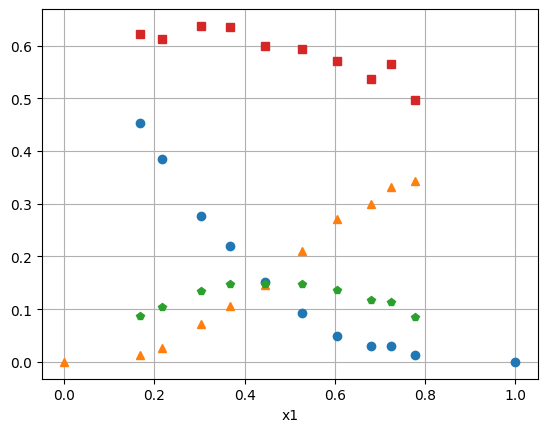

In [26]:
plt.plot(df['x₁'].values, df['ln γ₁'].values,'o')
plt.plot(df['x₁'].values, df['ln γ₂'].values, '^')
plt.plot(df['x₁'].values, df['G^E/RT'].values, 'p' )
plt.plot(df['x₁'].values, df['G^E/x1x2RT'].values, 's')
plt.xlabel('x1')
plt.grid(True)

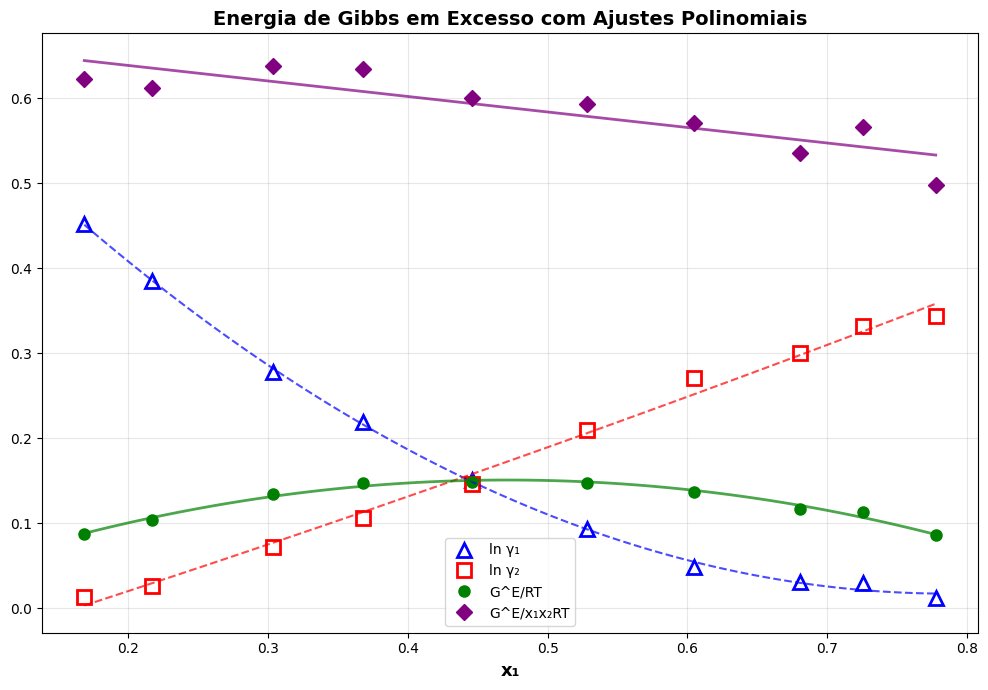

In [27]:
# Remover valores NaN
df_plot = df.dropna()

# Criar figura
plt.figure(figsize=(10, 7))

# ===== PLOTAR DADOS COM SÍMBOLOS DIFERENTES =====

# ln γ₁ - triângulo para cima (vazio)
plt.plot(df_plot['x₁'], df_plot['ln γ₁'], '^', 
         markersize=10, markerfacecolor='white', 
         markeredgecolor='blue', markeredgewidth=2,
         label='ln γ₁')

# ln γ₂ - quadrado (vazio)
plt.plot(df_plot['x₁'], df_plot['ln γ₂'], 's', 
         markersize=10, markerfacecolor='white', 
         markeredgecolor='red', markeredgewidth=2,
         label='ln γ₂')

# G^E/RT - círculo preenchido
plt.plot(df_plot['x₁'], df_plot['G^E/RT'], 'o', 
         markersize=8, color='green',
         label='G^E/RT')

# G^E/x1x2RT - diamante preenchido
plt.plot(df_plot['x₁'], df_plot['G^E/x1x2RT'], 'D', 
         markersize=8, color='purple',
         label='G^E/x₁x₂RT')

# ===== ADICIONAR LINHAS DE TENDÊNCIA POLINOMIAIS =====

x = df_plot['x₁'].values

# Polinômio para ln γ₁ (grau 2)
p1 = np.polyfit(x, df_plot['ln γ₁'].values, 2)
x_fit = np.linspace(x.min(), x.max(), 100)
y1_fit = np.polyval(p1, x_fit)
plt.plot(x_fit, y1_fit, '--', color='blue', linewidth=1.5, alpha=0.7)

# Polinômio para ln γ₂ (grau 2)
p2 = np.polyfit(x, df_plot['ln γ₂'].values, 2)
y2_fit = np.polyval(p2, x_fit)
plt.plot(x_fit, y2_fit, '--', color='red', linewidth=1.5, alpha=0.7)

# Polinômio para G^E/RT (grau 2)
p3 = np.polyfit(x, df_plot['G^E/RT'].values, 2)
y3_fit = np.polyval(p3, x_fit)
plt.plot(x_fit, y3_fit, '-', color='green', linewidth=2, alpha=0.7)

# Polinômio para G^E/x1x2RT (grau 1)
p4 = np.polyfit(x, df_plot['G^E/x1x2RT'].values, 1)
y4_fit = np.polyval(p4, x_fit)
plt.plot(x_fit, y4_fit, '-', color='purple', linewidth=2, alpha=0.7)

plt.xlabel('x₁', fontsize=13, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.title('Energia de Gibbs em Excesso com Ajustes Polinomiais', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [28]:
# Imprimir as equações
print("="*60)
print("EQUAÇÕES POLINOMIAIS")
print("="*60)

# ln γ₁ (grau 2)
print(f"\nln γ₁ = {p1[0]:.6f}x₁² + {p1[1]:.6f}x₁ + {p1[2]:.6f}")

# ln γ₂ (grau 2)
print(f"ln γ₂ = {p2[0]:.6f}x₁² + {p2[1]:.6f}x₁ + {p2[2]:.6f}")

# G^E/RT (grau 2)
print(f"G^E/RT = {p3[0]:.6f}x₁² + {p3[1]:.6f}x₁ + {p3[2]:.6f}")

# G^E/x1x2RT (grau 1)
print(f"G^E/x₁x₂RT = {p4[0]:.6f}x₁ + {p4[1]:.6f}")

print("="*60)

EQUAÇÕES POLINOMIAIS

ln γ₁ = 1.138411x₁² + -1.789523x₁ + 0.720421
ln γ₂ = 0.076505x₁² + 0.510465x₁ + -0.085026
G^E/RT = -0.683949x₁² + 0.644954x₁ + -0.001250
G^E/x₁x₂RT = -0.182487x₁ + 0.674990


Text(0.5, 0, 'x1.y1')

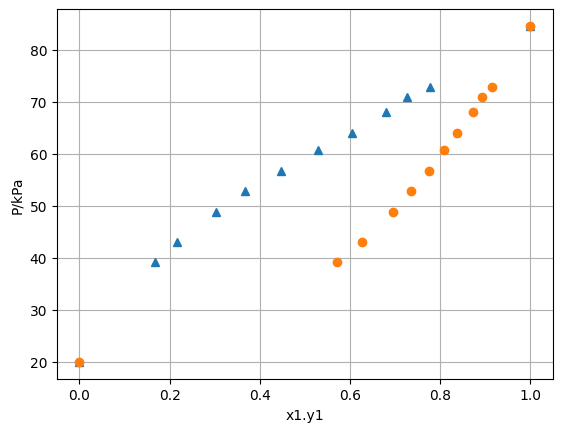

In [32]:
plt.plot(df['x₁'].values, df['P/kPa'].values,'^')
plt.plot(df['y₁'].values, df['P/kPa'].values,'o')
plt.grid(True)
plt.ylabel('P/kPa')
plt.xlabel('x1.y1')
